In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv("/data/cleaned/processed_raw_CareerMapping_with_scores.csv")

In [3]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [4]:
y = df['Role_encoded']

In [5]:
X

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,...,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence,tech_score,soft_skill_score
0,6,4,4,4,4,4,4,4,4,4,...,0.470877,0.039611,0.742567,0.086927,0.339776,0.091158,0.230518,0.208746,4.117647,0.340535
1,6,5,4,4,4,4,4,4,4,4,...,0.377581,0.090148,0.672546,0.071425,0.353678,0.104495,0.247432,0.196424,4.176471,0.318385
2,6,1,4,4,4,4,4,4,4,4,...,0.347739,0.138575,0.630705,0.095261,0.375125,0.135462,0.287253,0.268024,3.941176,0.355388
3,6,0,4,4,4,4,4,4,4,4,...,0.403756,0.114925,0.695280,0.122656,0.338899,0.161705,0.306562,0.258119,3.882353,0.353118
4,6,3,4,4,4,4,4,4,4,4,...,0.240337,0.050988,0.619390,0.065564,0.311896,0.147700,0.302978,0.207287,4.058824,0.304697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523,4,4,4,4,4,4,4,4,4,4,...,0.464080,0.286505,0.646072,0.204770,0.395754,0.186430,0.277724,0.381149,4.235294,0.412711
8524,4,4,4,4,4,4,4,4,4,4,...,0.150246,0.091591,0.414744,0.046008,0.475964,0.247092,0.378122,0.302362,3.764706,0.308295
8525,4,4,4,4,4,4,4,4,4,4,...,0.359465,0.195782,0.625882,0.288711,0.655578,0.427479,0.510943,0.508034,3.647059,0.469372
8526,4,4,4,4,4,4,4,4,4,4,...,0.341132,0.098238,0.588750,0.050389,0.486217,0.154404,0.379121,0.288568,4.000000,0.359076


In [6]:
y

0       6
1       6
2       6
3       6
4       6
       ..
8523    7
8524    7
8525    7
8526    7
8527    7
Name: Role_encoded, Length: 8528, dtype: int64

In [7]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [8]:
X_scaled

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,...,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence,tech_score,soft_skill_score
0,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.573087,0.042014,0.705145,0.196931,0.379002,0.078080,0.281878,0.333071,0.8000,0.318561
1,1.000000,0.833333,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.428043,0.139067,0.564651,0.155921,0.406338,0.114640,0.315227,0.305612,0.8125,0.201408
2,1.000000,0.166667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.381647,0.232067,0.480700,0.218979,0.448513,0.199526,0.393745,0.465167,0.7625,0.397125
3,1.000000,0.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.468737,0.186649,0.610265,0.291455,0.377277,0.271463,0.431816,0.443094,0.7500,0.385117
4,1.000000,0.500000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.214674,0.063863,0.457997,0.140414,0.324179,0.233073,0.424749,0.329821,0.7875,0.129011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.562520,0.516159,0.511534,0.508694,0.489078,0.339238,0.374954,0.717252,0.8250,0.700315
8524,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.074612,0.141839,0.047389,0.088679,0.646804,0.505524,0.572913,0.541683,0.7250,0.148039
8525,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.399878,0.341930,0.471023,0.730764,1.000000,1.000000,0.834800,1.000000,0.7000,1.000000
8526,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.371376,0.154604,0.396520,0.100267,0.666966,0.251451,0.574884,0.510945,0.7750,0.416631


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
svm_model = SVC(kernel='rbf', C=1000.0, random_state=42, probability=True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {acc}")

SVM Accuracy: 0.9935521688159438


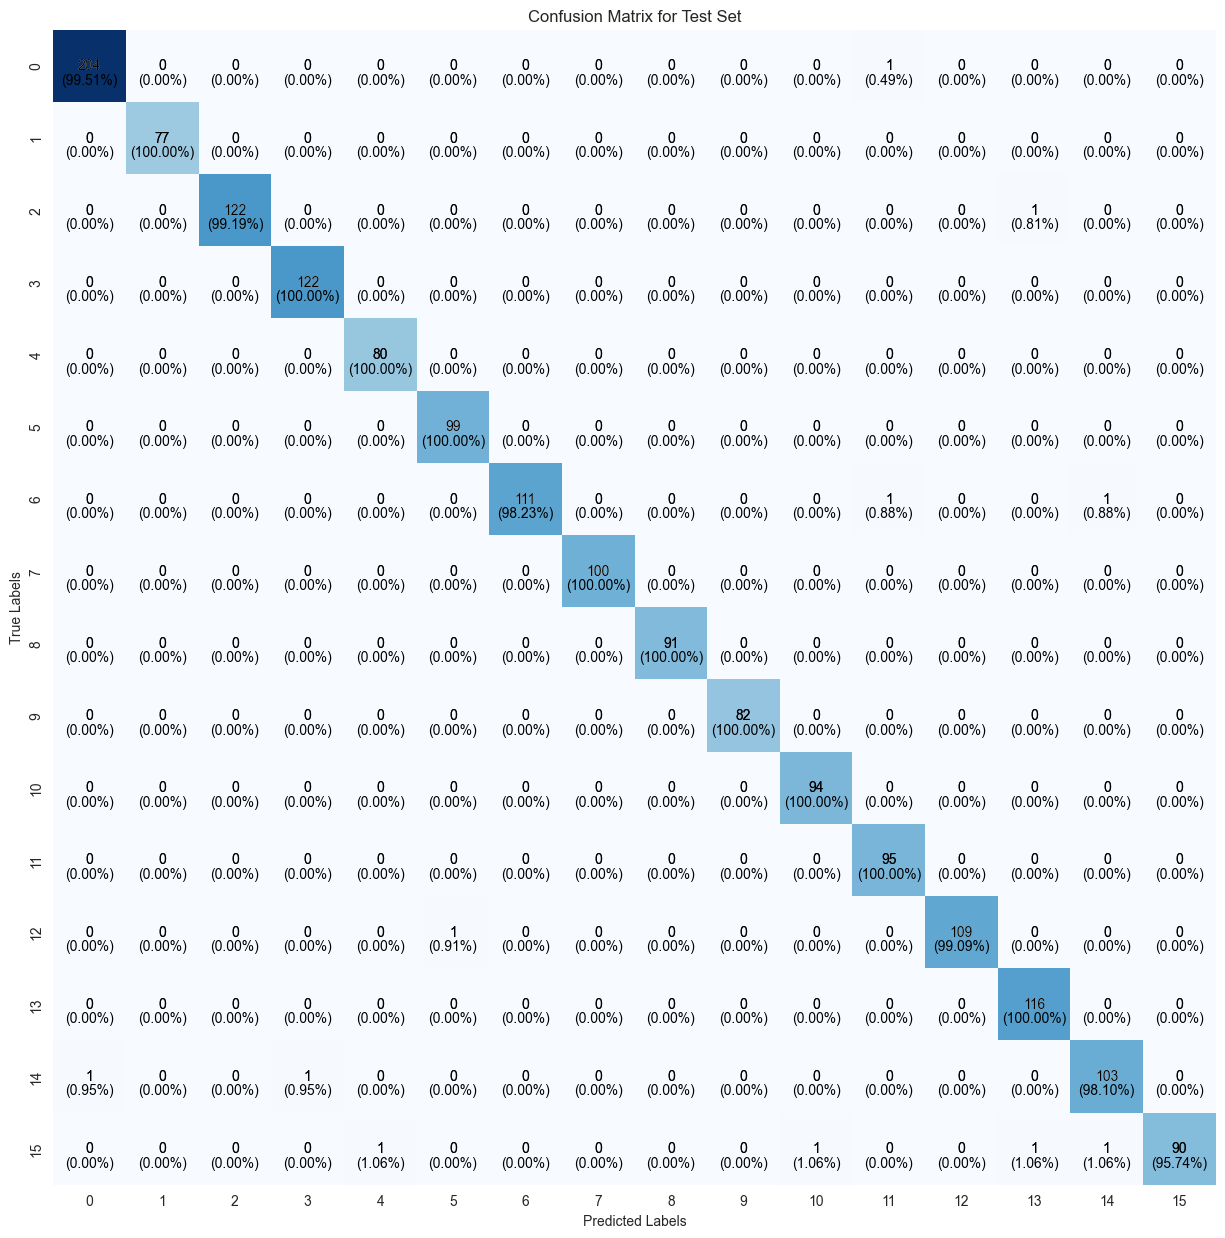

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00        77
           2       1.00      0.99      1.00       123
           3       0.99      1.00      1.00       122
           4       0.99      1.00      0.99        80
           5       0.99      1.00      0.99        99
           6       1.00      0.98      0.99       113
           7       1.00      1.00      1.00       100
           8       1.00      1.00      1.00        91
           9       1.00      1.00      1.00        82
          10       0.99      1.00      0.99        94
          11       0.98      1.00      0.99        95
          12       1.00      0.99      1.00       110
          13       0.98      1.00      0.99       116
          14       0.98      0.98      0.98       105
          15       1.00      0.96      0.98        94

    accuracy                           0.99      1706
   macro avg       0.99   

---------------------------------------------------------------------------------------------------

In [13]:
df = pd.read_csv("/data/cleaned/processed_raw_CareerMapping.csv")

In [14]:
X = df.drop(['Role', 'Role_encoded'], axis=1)

In [15]:
y = df['Role_encoded']

In [16]:
X

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,...,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence
0,6,4,4,4,4,4,4,4,4,4,...,0.714603,0.480564,0.470877,0.039611,0.742567,0.086927,0.339776,0.091158,0.230518,0.208746
1,6,5,4,4,4,4,4,4,4,4,...,0.617218,0.452903,0.377581,0.090148,0.672546,0.071425,0.353678,0.104495,0.247432,0.196424
2,6,1,4,4,4,4,4,4,4,4,...,0.814072,0.461668,0.347739,0.138575,0.630705,0.095261,0.375125,0.135462,0.287253,0.268024
3,6,0,4,4,4,4,4,4,4,4,...,0.607495,0.521783,0.403756,0.114925,0.695280,0.122656,0.338899,0.161705,0.306562,0.258119
4,6,3,4,4,4,4,4,4,4,4,...,0.781293,0.319539,0.240337,0.050988,0.619390,0.065564,0.311896,0.147700,0.302978,0.207287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523,4,4,4,4,4,4,4,4,4,4,...,0.712385,0.572244,0.464080,0.286505,0.646072,0.204770,0.395754,0.186430,0.277724,0.381149
8524,4,4,4,4,4,4,4,4,4,4,...,0.868257,0.108561,0.150246,0.091591,0.414744,0.046008,0.475964,0.247092,0.378122,0.302362
8525,4,4,4,4,4,4,4,4,4,4,...,0.692413,0.429431,0.359465,0.195782,0.625882,0.288711,0.655578,0.427479,0.510943,0.508034
8526,4,4,4,4,4,4,4,4,4,4,...,0.818076,0.385867,0.341132,0.098238,0.588750,0.050389,0.486217,0.154404,0.379121,0.288568


In [17]:
y

0       6
1       6
2       6
3       6
4       6
       ..
8523    7
8524    7
8525    7
8526    7
8527    7
Name: Role_encoded, Length: 8528, dtype: int64

In [18]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [19]:
X_scaled

,Database Fundamentals,Computer Architecture,Distributed Computing Systems,Cyber Security,Networking,Software Development,Programming Skills,Project Management,Computer Forensics Fundamentals,Technical Communication,...,Openness,Conscientousness,Extraversion,Agreeableness,Emotional_Range,Conversation,Openness to Change,Hedonism,Self-enhancement,Self-transcendence
0,1.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.447745,0.594344,0.573087,0.042014,0.705145,0.196931,0.379002,0.078080,0.281878,0.333071
1,1.000000,0.833333,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.158897,0.550150,0.428043,0.139067,0.564651,0.155921,0.406338,0.114640,0.315227,0.305612
2,1.000000,0.166667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.742773,0.564154,0.381647,0.232067,0.480700,0.218979,0.448513,0.199526,0.393745,0.465167
3,1.000000,0.000000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.130058,0.660199,0.468737,0.186649,0.610265,0.291455,0.377277,0.271463,0.431816,0.443094
4,1.000000,0.500000,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.645548,0.337077,0.214674,0.063863,0.457997,0.140414,0.324179,0.233073,0.424749,0.329821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8523,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.441166,0.740821,0.562520,0.516159,0.511534,0.508694,0.489078,0.339238,0.374954,0.717252
8524,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.903486,0.000000,0.074612,0.141839,0.047389,0.088679,0.646804,0.505524,0.572913,0.541683
8525,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.381928,0.512650,0.399878,0.341930,0.471023,0.730764,1.000000,1.000000,0.834800,1.000000
8526,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0.754650,0.443048,0.371376,0.154604,0.396520,0.100267,0.666966,0.251451,0.574884,0.510945


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
svm_model = SVC(kernel='rbf', C=1000.0, random_state=42, probability=True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {acc}")

SVM Accuracy: 0.9941383352872216


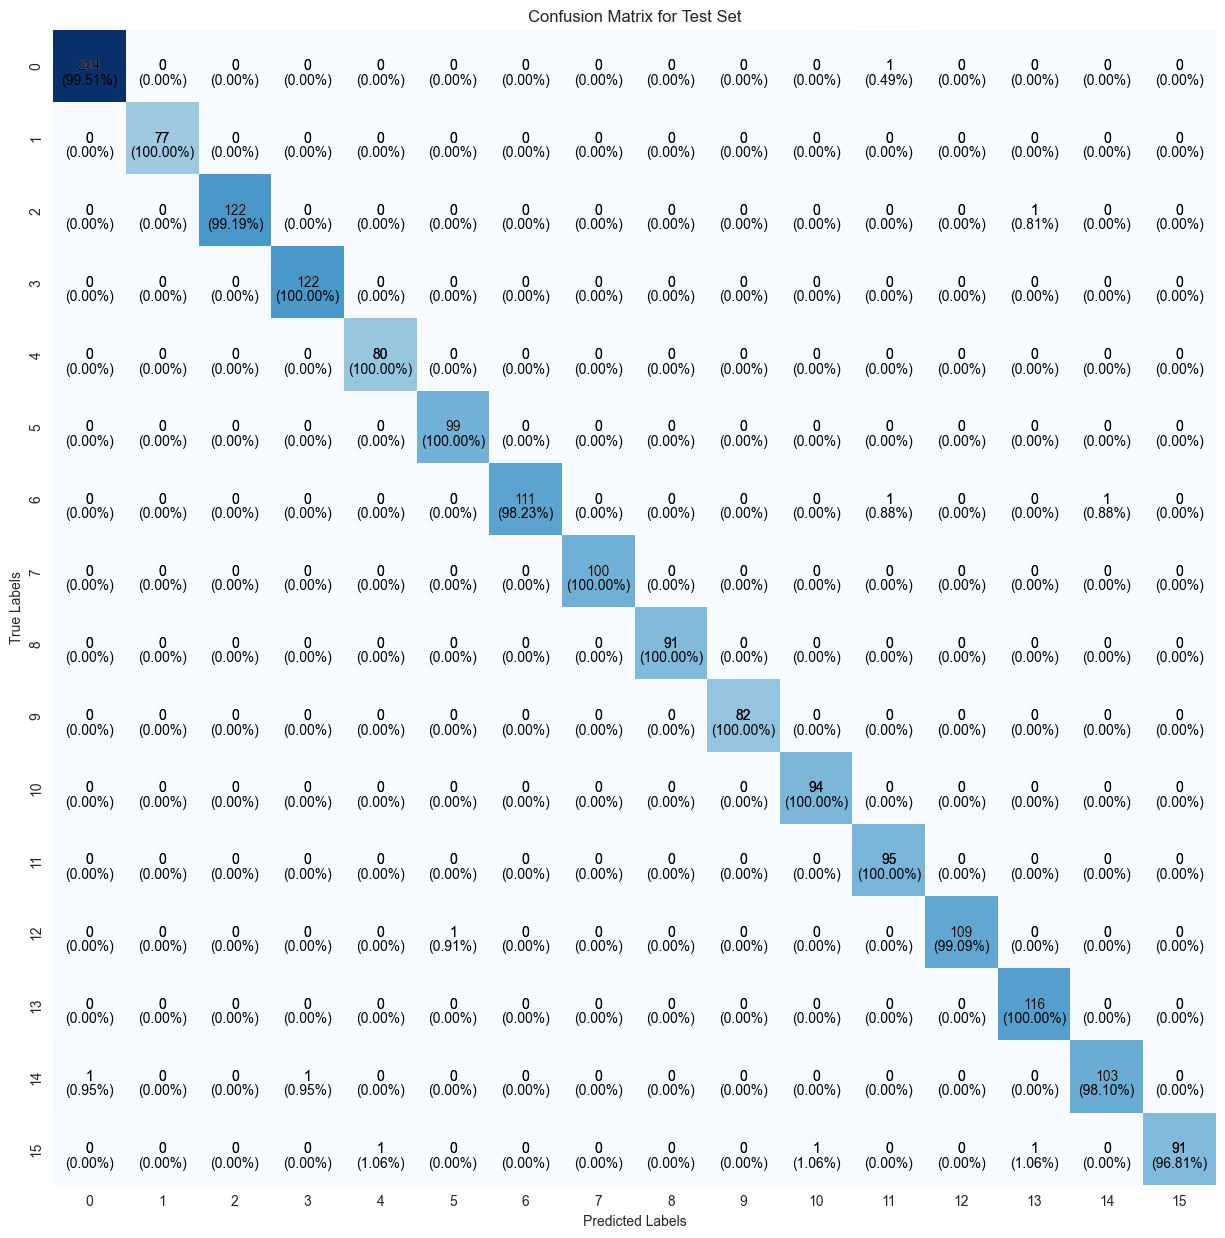

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
#print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00        77
           2       1.00      0.99      1.00       123
           3       0.99      1.00      1.00       122
           4       0.99      1.00      0.99        80
           5       0.99      1.00      0.99        99
           6       1.00      0.98      0.99       113
           7       1.00      1.00      1.00       100
           8       1.00      1.00      1.00        91
           9       1.00      1.00      1.00        82
          10       0.99      1.00      0.99        94
          11       0.98      1.00      0.99        95
          12       1.00      0.99      1.00       110
          13       0.98      1.00      0.99       116
          14       0.99      0.98      0.99       105
          15       1.00      0.97      0.98        94

    accuracy                           0.99      1706
   macro avg       0.99   